# Module61-70
## 20200921-20200925

1. alibi
1. yellowbrick
1. sklearnplot
1. Eli5
1. LIME
1. pyspark
1. findspark
1. dlib
1. glob
1. cv2

## 7.61 alibi
对变量， 图像，文本等场景的模型解释

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from alibi.explainers.ale import ALE, plot_ale

In [3]:
data = load_iris()
feature_names = data.feature_names
target_names = data.target_names
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

1.0

In [4]:
logit_fun_lr = lr.decision_function
proba_fun_lr = lr.predict_proba
logit_ale_lr = ALE(logit_fun_lr, feature_names=feature_names, target_names=target_names)
proba_ale_lr = ALE(proba_fun_lr, feature_names=feature_names, target_names=target_names)
logit_exp_lr = logit_ale_lr.explain(X_train)
proba_exp_lr = proba_ale_lr.explain(X_train)

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


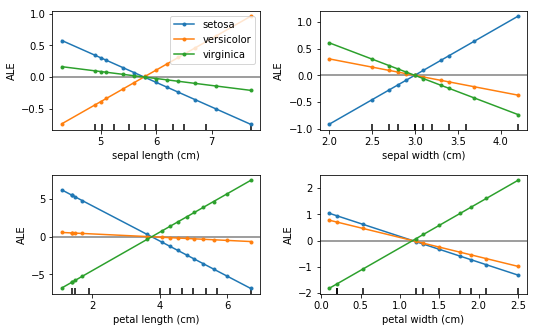

In [5]:
plot_ale(logit_exp_lr, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None);

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from alibi.explainers import IntegratedGradients
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from alibi.datasets import fetch_imagenet
from alibi.utils.visualization import visualize_image_attr
print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # True

TF version:  2.0.0
Eager execution enabled:  True


In [7]:
category = 'Persian cat'
image_shape = (224, 224, 3)
data, labels = fetch_imagenet(category, nb_images=3, target_size=image_shape[:2], seed=2, return_X_y=True)
print('Images shape: {}'.format(data.shape))
data = (data / 255).astype('float32')

Images shape: (3, 224, 224, 3)


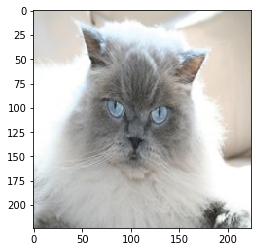

In [8]:
i = 2
plt.imshow(data[i]);

In [21]:
model = ResNet50V2(weights='imagenet')

In [22]:
n_steps = 50
method = "gausslegendre"
internal_batch_size = 50
ig  = IntegratedGradients(model,
                          n_steps=n_steps,
                          method=method,
                          internal_batch_size=internal_batch_size)

In [23]:
predictions = model(data).numpy().argmax(axis=1)
explanation = ig.explain(data,
                         baselines=None,
                         target=predictions)

In [24]:
explanation.meta

{'name': 'IntegratedGradients',
 'type': ['whitebox'],
 'explanations': ['local'],
 'params': {'method': 'gausslegendre',
  'n_steps': 50,
  'internal_batch_size': 50,
  'layer': 0}}

In [25]:
explanation.data.keys()

dict_keys(['attributions', 'X', 'baselines', 'predictions', 'deltas', 'target'])

In [26]:
attrs = explanation.attributions

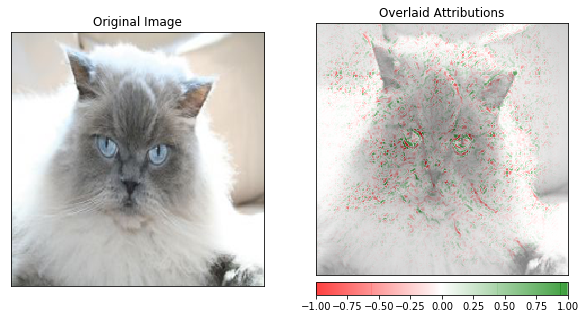

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=data[i], method='original_image',
                    title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);

visualize_image_attr(attr=attrs[i], original_image=data[i], method='blended_heat_map',
                    sign='all', show_colorbar=True, title='Overlaid Attributions',
                     plt_fig_axis=(fig, ax[1]), use_pyplot=True);

---
## 7.62 yellowbrick

In [43]:
data = load_iris()
feature_names = data.feature_names
target_names = data.target_names
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


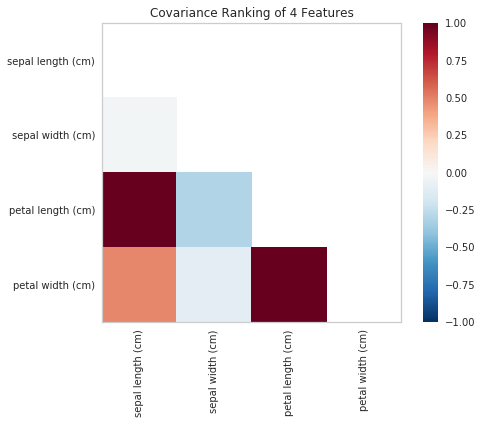

In [46]:
from yellowbrick.features import Rank2D
features = feature_names
visualizer = Rank2D(
    features=features, algorithm='covariance'
)
visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
visualizer.transform(X_train)             # Transform the data
visualizer.show()                   # Finalize and render the figure

Liblinear failed to converge, increase the number of iterations.
From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
could not determine class_counts_ from previously fitted classifier
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


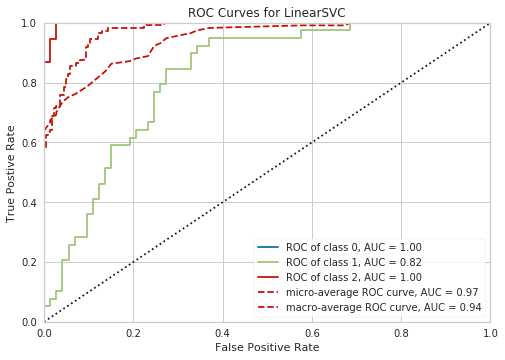

In [47]:
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ROCAUC

model = LinearSVC()
model.fit(X_train,y_train)
visualizer = ROCAUC(model)
visualizer.score(X_train,y_train)
visualizer.show()

---
## 7.63 sklearnplot

[文档示例代码](https://github.com/reiinakano/scikit-plot/tree/master/examples)


- p_r_curves.png
- plot_calibration_curve.py
- plot_confusion_matrix.py
- plot_cumulative_gain.py
- plot_elbow_curve.py
- plot_feature_importances.py
- plot_ks_statistic.py
- plot_learning_curve.py
- plot_lift_curve.py
- plot_pca_2d_projection.py
- plot_pca_component_variance.py
- plot_precision_recall.py
- plot_roc.py
- plot_silhouette.py
- roc_curves.png



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


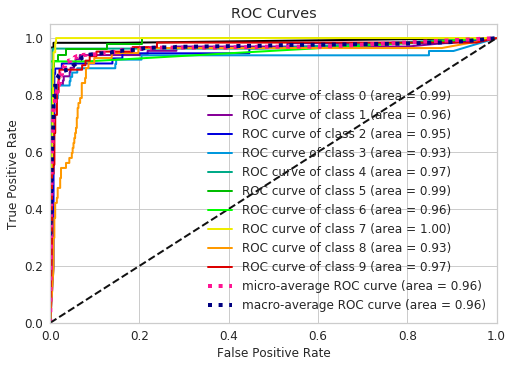

In [48]:
# The usual train-test split mumbo-jumbo
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
nb = GaussianNB()
nb.fit(X_train, y_train)
predicted_probas = nb.predict_proba(X_test)

# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

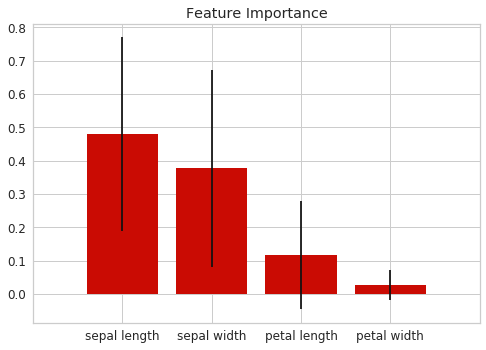

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris as load_data
import matplotlib.pyplot as plt
import scikitplot as skplt

X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
rf.fit(X, y)
skplt.estimators.plot_feature_importances(rf,
                                          feature_names=['petal length',
                                                         'petal width',
                                                         'sepal length',
                                                         'sepal width'])
plt.show()

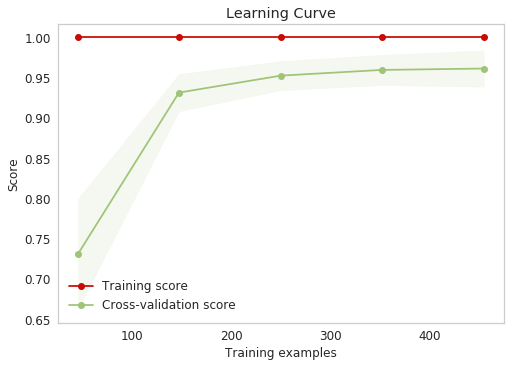

In [51]:
    
"""An example showing the plot_learning_curve method used by a scikit-learn classifier"""
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
skplt.estimators.plot_learning_curve(rf, X, y)
plt.show()

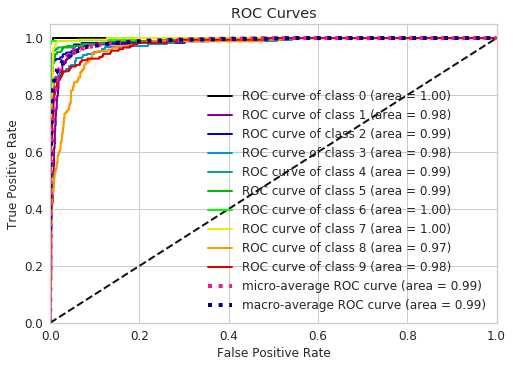

In [52]:
"""
An example showing the plot_roc_curve method
used by a scikit-learn classifier
"""
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
nb = GaussianNB()
nb.fit(X, y)
probas = nb.predict_proba(X)
skplt.metrics.plot_roc(y_true=y, y_probas=probas)
plt.show()

## 7.64 ELI5

In [55]:
import csv
import numpy as np

with open('./data/train.csv', 'rt') as f:
    data = list(csv.DictReader(f))
data[:1]

[OrderedDict([('PassengerId', '1'),
              ('Survived', '0'),
              ('Pclass', '3'),
              ('Name', 'Braund, Mr. Owen Harris'),
              ('Sex', 'male'),
              ('Age', '22'),
              ('SibSp', '1'),
              ('Parch', '0'),
              ('Ticket', 'A/5 21171'),
              ('Fare', '7.25'),
              ('Cabin', ''),
              ('Embarked', 'S')])]

In [56]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

_all_xs = [{k: v for k, v in row.items() if k != 'Survived'} for row in data]
_all_ys = np.array([int(row['Survived']) for row in data])

all_xs, all_ys = shuffle(_all_xs, _all_ys, random_state=0)
train_xs, valid_xs, train_ys, valid_ys = train_test_split(
    all_xs, all_ys, test_size=0.25, random_state=0)
print('{} items total, {:.1%} true'.format(len(all_xs), np.mean(all_ys)))

891 items total, 38.4% true


In [57]:
for x in all_xs:
    if x['Age']:
        x['Age'] = float(x['Age'])
    else:
        x.pop('Age')
    x['Fare'] = float(x['Fare'])
    x['SibSp'] = int(x['SibSp'])
    x['Parch'] = int(x['Parch'])

In [58]:
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

clf = XGBClassifier()
vec = DictVectorizer()
pipeline = make_pipeline(vec, clf)

def evaluate(_clf):
    scores = cross_val_score(_clf, all_xs, all_ys, scoring='accuracy', cv=10)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _clf.fit(train_xs, train_ys)  # so that parts of the original pipeline are fitted

evaluate(pipeline)

Accuracy: 0.820 ± 0.064


In [59]:
from eli5 import show_weights
show_weights(clf, vec=vec)

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


Weight,Feature
0.3712,Sex=female
0.2248,Pclass=3
0.1074,Ticket=1601
0.0526,Pclass=1
0.0468,SibSp
0.0286,Age
0.0284,Embarked=C
0.0278,Cabin=
0.0269,Embarked=S
0.0260,Parch


In [60]:
from eli5 import show_prediction
show_prediction(clf, valid_xs[1], vec=vec, show_feature_values=True)

In [61]:
no_missing = lambda feature_name, feature_value: not np.isnan(feature_value)
show_prediction(clf, valid_xs[1], vec=vec, show_feature_values=True, feature_filter=no_missing)

---
## 7.65 LIME

In [4]:
import os
import keras
from keras.applications.resnet_v2 import ResNet50V2
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

inet_model = ResNet50V2()

Notebook run using keras: 2.4.3


('n02099601', 'golden_retriever', 0.46327606)
('n02104029', 'kuvasz', 0.12799436)
('n02099712', 'Labrador_retriever', 0.0319339)
('n02111500', 'Great_Pyrenees', 0.030812345)
('n02108551', 'Tibetan_mastiff', 0.014666363)


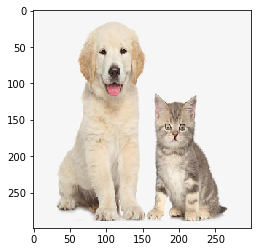

In [7]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

images = transform_img_fn([os.path.join('data','d&c.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [9]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

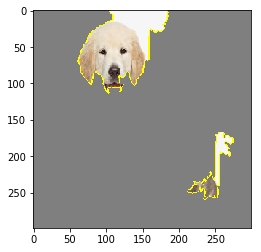

In [10]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

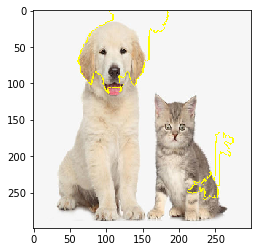

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

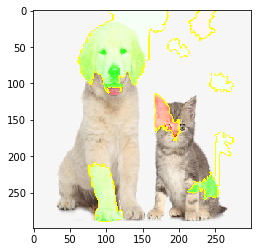

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

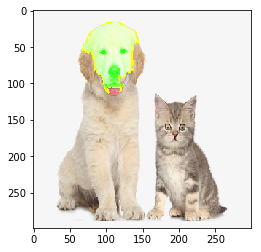

In [13]:

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

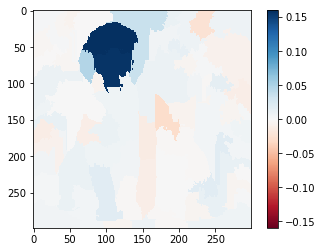

In [15]:

ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

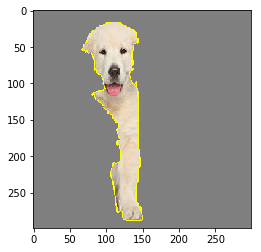

In [17]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

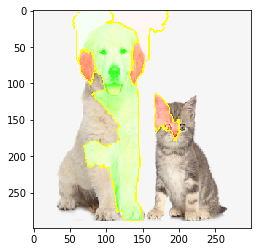

In [18]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [19]:
from sklearn.datasets import load_boston
import sklearn.ensemble
import numpy as np

In [20]:
boston = load_boston()
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(boston.data, boston.target, train_size=0.80)
rf.fit(train, labels_train)
print('Random Forest MSError', np.mean((rf.predict(test) - labels_test) ** 2))
categorical_features = np.argwhere(np.array([len(set(boston.data[:,x])) for x in range(boston.data.shape[1])]) <= 10).flatten()

Random Forest MSError 14.809416731960905


In [21]:
import lime
import lime.lime_tabular

In [22]:
explainer = lime.lime_tabular.LimeTabularExplainer(train,
                                                   feature_names=boston.feature_names,
                                                   class_names=['price'],
                                                   categorical_features=categorical_features,
                                                   verbose=True,
                                                   mode='regression')
i = 25
exp = explainer.explain_instance(test[i], rf.predict, num_features=5)
exp.show_in_notebook(show_table=True)
exp.as_list()

Intercept 25.1662753399624
Prediction_local [19.73252075]
Right: 20.061499999999963


[('RM <= 5.89', -4.190197719929422),
 ('11.46 < LSTAT <= 16.95', -1.0399090138355722),
 ('PTRATIO <= 16.90', 0.7143191713146584),
 ('335.00 < TAX <= 666.00', -0.5893250399982297),
 ('B <= 375.30', -0.32864198952789075)]

---
## 7.76 pyspark + 7.77 findspark

In [2]:
import sys, os

# Path for spark source folder
os.environ['SPARK_HOME'] = "/usr/spark"
# Append pyspark  to Python Path
sys.path.append("/usr/spark/python/")
sys.path.append("/usr/spark/python/lib/")
memory = '10g'
pyspark_submit_args = ' --driver-memory ' + memory + ' pyspark-shell'
os.environ["PYSPARK_SUBMIT_ARGS"] = pyspark_submit_args

import findspark
findspark.init()
import pyspark
from pyspark.sql import SQLContext
from pyspark import SparkContext
sc = SparkContext()

In [3]:
from pyspark.sql import SparkSession
import os
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .master("local") \
    .config('spark.debug.maxToStringFields', '500') \
    .config('spark.driver.maxResultSize', '10g') \
    .getOrCreate()
airDF = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost:5432/staging") \
    .option("dbtable", "registration_all") \
    .option("user", "dater") \
    .option("password", "q1w2e3r4") \
    .load()
airDF.show()

+---------+--------+-----------------------+---------+--------+-----+-------+---------+---------+-------+----------+----+----+------+-----+---------+------+----+---+------+-----+
|yearmonth|province|                   city|makeshort| stdmake|brand|modelcn|maketype1|maketype2|segment|subsegment|fuel|body| owner| msrp|msrprange|    tp|  pl| aa|engine|sales|
+---------+--------+-----------------------+---------+--------+-----+-------+---------+---------+-------+----------+----+----+------+-----+---------+------+----+---+------+-----+
|   201908|    山西|                 长治市|     上汽|上汽大众| 大众| 帕萨特|     德系|     合资|      B|       B-M|汽油|三厢|  个人|18.49|15 - 20万|159480|1.4T|  Y|双离合|    4|
|   201908|    贵州|                 铜仁市|     上汽|上汽大众| 大众| 帕萨特|     德系|     合资|      B|       B-M|汽油|三厢|不确定|18.49|15 - 20万|159480|1.4T|  Y|双离合|    1|
|   201908|    安徽|                 亳州市|     上汽|上汽大众| 大众| 帕萨特|     德系|     合资|      B|       B-M|汽油|三厢|  个人|18.49|15 - 20万|159480|1.4T|  Y|双离合|   14|
|   201908|    江西

In [4]:
type(airDF)

pyspark.sql.dataframe.DataFrame

---
## 7.78,7.79,7.80 dlib glob cv2

In [ ]:
# coding: utf-8
"""
@author: ldw
"""

import sys
import os
import dlib
import glob
import cv2
import psycopg2
import urllib.request

current_path = os.getcwd()
model_path = current_path + '/face/model/'
shape_predictor_model = model_path + '/face/shape_predictor_5_face_landmarks.dat'
face_rec_model = model_path + '/face/dlib_face_recognition_resnet_model_v1.dat'
face_folder = current_path + '/face/faces/'
output_folder = current_path + '/face/output/'


In [ ]:
def getData(dealerCode, monthDay):
    conn = psycopg2.connect(database="staging", user="dater", password="q1w2e3r4", host="127.0.0.1", port="5432")
    cur = conn.cursor()
    query = ("""SELECT customer_id, image_url
    FROM public.ylk_raw_20190805
    where dealer_code='%s' and sys_rec_date='%s';""") % (dealerCode, monthDay)
    print(query)
    cur.execute(query)
    dat = cur.fetchall()
    conn.commit()
    return(dat)

dat = getData('WM0001','2018-11-21')

In [ ]:
for i in range(len(dat)):
    #print(dat[i])
    tmpImgName = face_folder + dat[i][0] + '___' + dat[i][1].split('/')[3]
    urllib.request.urlretrieve(dat[i][1],tmpImgName)
    #dat[i][1].split('/')

In [ ]:
# 导入模型
detector = dlib.get_frontal_face_detector()
shape_detector = dlib.shape_predictor(shape_predictor_model)
face_recognizer = dlib.face_recognition_model_v1(face_rec_model)

# 为后面操作方便，建了几个列表
descriptors = []
images = []
# 遍历faces文件夹中所有的图片
for f in glob.glob(os.path.join(face_folder, "*.jpg")):
    print('Processing file：{}'.format(f))
    # 读取图片
    img = cv2.imread(f)
    # 转换到rgb颜色空间
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 检测人脸
    dets = detector(img2, 1)
    print("Number of faces detected: {}".format(len(dets)))

    # 遍历所有的人脸
    for index, face in enumerate(dets):
        # 检测人脸特征点
        shape = shape_detector(img2, face)
        # 投影到128D
        face_descriptor = face_recognizer.compute_face_descriptor(img2, shape)

        # 保存相关信息
        descriptors.append(face_descriptor)
        images.append((img2, shape, f))

In [ ]:
# 聚类
labels = dlib.chinese_whispers_clustering(descriptors, 0.35)
print("labels: {}".format(labels))
num_classes = len(set(labels))
print("Number of clusters: {}".format(num_classes))

# 为了方便操作，用字典类型保存
face_dict = {}
for i in range(num_classes):
    face_dict[i] = []
# print face_dict
for i in range(len(labels)):
    face_dict[labels[i]].append(images[i])


In [ ]:
# print face_dict.keys()
# 遍历字典，保存结果
for key in face_dict.keys():
    file_dir = os.path.join(output_folder, str(key))
    if not os.path.isdir(file_dir):
        os.makedirs(file_dir)

    for index, (image, shape, f) in enumerate(face_dict[key]):
        #print(f.split('/'))
        file_path = os.path.join(file_dir, 'face_' + f.split('/')[7] + '_' +  str(index))
        print(file_path)
        dlib.save_face_chip(image, shape, file_path, size=150, padding=0.25)